In [41]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [3]:
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [8]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset['data']
target = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [9]:
# Normalise the target data (this will make clearer training curves)
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [10]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)


In [11]:
train_data.shape, test_data.shape, train_target.shape, test_target.shape

((397, 10), (45, 10), (397,), (45,))

#### Train a feedforward neural network model

In [12]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    return model





In [13]:
# Print the model summary

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [15]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64)



Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 1s 4ms/sample - loss: 1.0199 - mae: 0.8720 - val_loss: 0.8968 - val_mae: 0.8042
Epoch 2/100
337/337 [==============================] - 0s 506us/sample - loss: 0.9427 - mae: 0.8367 - val_loss: 0.7348 - val_mae: 0.7254
Epoch 3/100
337/337 [==============================] - 0s 577us/sample - loss: 0.7419 - mae: 0.7442 - val_loss: 0.4957 - val_mae: 0.5810
Epoch 4/100
337/337 [==============================] - 0s 583us/sample - loss: 0.5631 - mae: 0.6015 - val_loss: 0.4419 - val_mae: 0.5248
Epoch 5/100
337/337 [==============================] - 0s 570us/sample - loss: 0.5133 - mae: 0.5621 - val_loss: 0.3888 - val_mae: 0.5024
Epoch 6/100
337/337 [==============================] - 0s 333us/sample - loss: 0.4849 - mae: 0.5647 - val_loss: 0.4414 - val_mae: 0.5285
Epoch 7/100
337/337 [==============================] - 0s 582us/sample - loss: 0.4942 - mae: 0.5614 - val_loss: 0.4358 - val_mae: 0.517

In [16]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)


45/1 - 0s - loss: 1.1188 - mae: 0.7884


[0.8991595082812839, 0.7883945]

#### Plot the learning curves

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

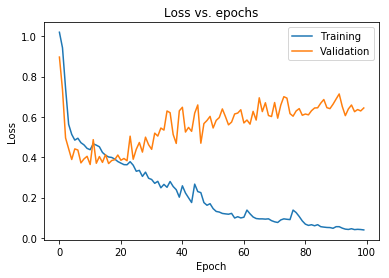

In [18]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [23]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [24]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate) , 
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate) , 
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate) , 
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate) , 
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate) , 
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate) , 
        Dense(1)
    ])
    return model

In [30]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)



In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [32]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 1.0316 - mae: 0.8707 - val_loss: 0.9290 - val_mae: 0.8161
Epoch 2/100
337/337 [==============================] - 0s 582us/sample - loss: 1.0150 - mae: 0.8640 - val_loss: 0.8865 - val_mae: 0.7956
Epoch 3/100
337/337 [==============================] - 0s 591us/sample - loss: 0.9618 - mae: 0.8378 - val_loss: 0.7653 - val_mae: 0.7358
Epoch 4/100
337/337 [==============================] - 0s 591us/sample - loss: 0.8397 - mae: 0.7836 - val_loss: 0.5608 - val_mae: 0.6190
Epoch 5/100
337/337 [==============================] - 0s 583us/sample - loss: 0.6407 - mae: 0.6647 - val_loss: 0.4856 - val_mae: 0.5381
Epoch 6/100
337/337 [==============================] - 0s 586us/sample - loss: 0.7144 - mae: 0.6580 - val_loss: 0.4430 - val_mae: 0.5155
Epoch 7/100
337/337 [==============================] - 0s 592us/sample - loss: 0.5715 - mae: 0.6104 - val_loss: 0.4427 - val_mae: 0.543

In [28]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)


45/1 - 0s - loss: 0.8269 - mae: 0.6789


[0.6747011701265971, 0.67891127]

#### Plot the learning curves

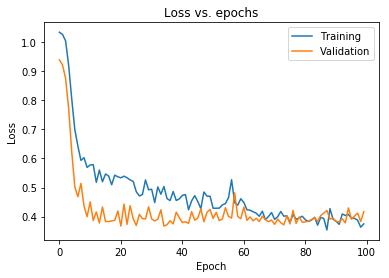

In [29]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [33]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback
class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('starting training ...')
        
    def on_train_end(self, logs=None):
        print("Finished training!")

    def on_epoch_begin(self, epoch, logs=None):
        print(f'starting epoch {epoch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finish epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")

    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")

        
        

In [39]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print('starting testing ...')
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")

    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")


In [42]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print('starting prediction ...')
        
    def on_predict_end(self, logs=None):
        print("Finished predcition!")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Predcition: Starting batch {batch}")

    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")


In [34]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)


In [35]:
# Compile the model
model.compile(optimizer='adam', loss="mse")



#### Train the model with the callback

In [36]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_target, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])



starting training ...
starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finish epoch 0
starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finish epoch 1
starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finish epoch 2
Finished training!


In [40]:
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])


starting testing ...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8475140823258294

In [43]:
# Make predictions with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])


starting prediction ...
Predcition: Starting batch 0
Prediction: Finished batch 0
Predcition: Starting batch 1
Prediction: Finished batch 1
Finished predcition!


array([[ 0.02430552],
       [-0.02703841],
       [ 0.0410796 ],
       [-0.07216578],
       [-0.05309442],
       [-0.01029731],
       [-0.04444392],
       [ 0.07416884],
       [ 0.04287098],
       [ 0.05841498],
       [ 0.01584012],
       [-0.05761549],
       [ 0.05493436],
       [-0.05672126],
       [ 0.03637072],
       [ 0.05585622],
       [-0.04242731],
       [-0.04710198],
       [-0.00901864],
       [-0.05093937],
       [-0.00114534],
       [-0.01636241],
       [-0.03856927],
       [ 0.03381255],
       [ 0.07016781],
       [ 0.06976017],
       [-0.05135891],
       [-0.00405456],
       [ 0.00937402],
       [ 0.02044425],
       [ 0.03743752],
       [-0.02455394],
       [-0.05545646],
       [ 0.01553068],
       [-0.06663807],
       [ 0.02822533],
       [ 0.03559449],
       [-0.04851934],
       [-0.01565252],
       [-0.04109919],
       [ 0.04899086],
       [ 0.03139076],
       [-0.04618685],
       [ 0.05305345],
       [ 0.04476401]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [56]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64, 
                                        verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)] )

In [57]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_target, verbose=2)


45/1 - 0s - loss: 0.6372


0.6248942971229553

In [58]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64, verbose=False,
                                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [59]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_target, verbose=2 )


45/1 - 0s - loss: 0.6981


0.6859496606720819

#### Plot the learning curves

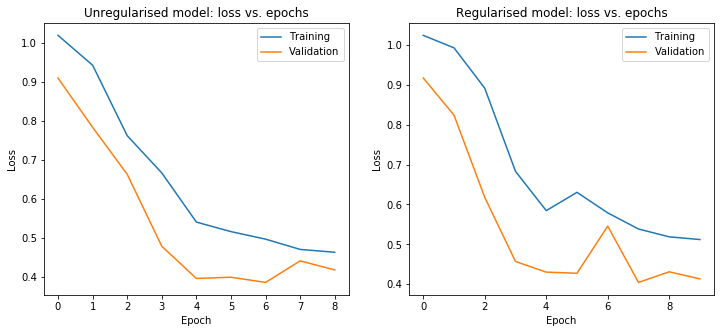

In [60]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()